## 1.Load all the required libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.graph_objs as go
import plotly.express    as px 
import nltk
import re
import string

from scipy.stats import norm
from wordcloud   import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

from textblob import TextBlob
import re
from collections import Counter

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from IPython.display import Markdown as md


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pfizer-vaccine-tweets/vaccination_tweets.csv


### 1.1 Load the dataset

In [2]:
tweets = pd.read_csv("/kaggle/input/pfizer-vaccine-tweets/vaccination_tweets.csv")

In [3]:
tweets.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [4]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2147 entries, 0 to 2146
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                2147 non-null   int64 
 1   user_name         2147 non-null   object
 2   user_location     1685 non-null   object
 3   user_description  2042 non-null   object
 4   user_created      2147 non-null   object
 5   user_followers    2147 non-null   int64 
 6   user_friends      2147 non-null   int64 
 7   user_favourites   2147 non-null   int64 
 8   user_verified     2147 non-null   bool  
 9   date              2147 non-null   object
 10  text              2147 non-null   object
 11  hashtags          1608 non-null   object
 12  source            2146 non-null   object
 13  retweets          2147 non-null   int64 
 14  favorites         2147 non-null   int64 
 15  is_retweet        2147 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 239.1+ KB


In [5]:
tweets.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,2.147000e+03,2.147000e+03,2147.000000,2147.000000,2147.000000,2147.000000
mean,1.341186e+18,6.831300e+04,1175.169539,13244.982301,1.801584,10.876572
std,2.236340e+15,5.095084e+05,2482.423046,42532.446849,13.197113,80.415128
min,1.337728e+18,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.339296e+18,1.160000e+02,174.500000,335.000000,0.000000,0.000000
50%,1.341080e+18,6.250000e+02,445.000000,1571.000000,0.000000,1.000000
75%,1.343023e+18,3.158000e+03,1191.000000,9162.000000,1.000000,4.000000
max,1.345494e+18,1.371493e+07,64421.000000,924667.000000,446.000000,2129.000000


In [6]:
#Number of rows and columns in the dataset
print("There are {} rows and {} columns in the dataset.".format(tweets.shape[0],tweets.shape[1]))

There are 2147 rows and 16 columns in the dataset.


## 2.Exploratory Data Analysis[EDA]:

### 1.Types of Twitter accounts

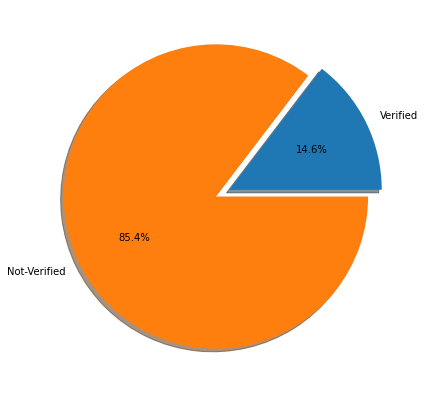

In [7]:
dict_ = tweets['user_verified'].value_counts().to_dict()
dict_['Verified'] = dict_.pop(True)
dict_['Not-Verified'] = dict_.pop(False)

plt.figure(figsize=(7,7))
plt.pie(x=dict_.values(), labels=dict_.keys(), autopct='%1.1f%%', shadow=True, startangle=0, explode = [0.1, 0])
plt.show()

### 2.Top 5 Sources (Platform) of tweets

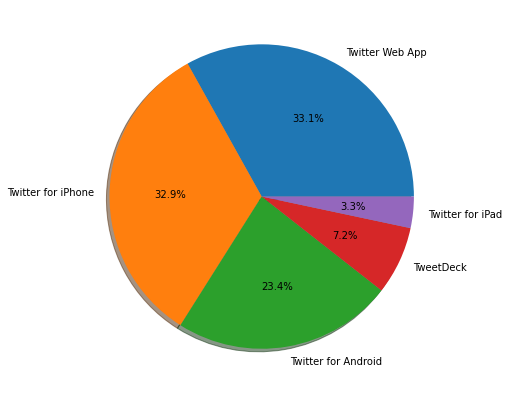

In [8]:
from collections import Counter
dict_ = Counter(tweets['source'].tolist()).most_common(5)
temp = pd.DataFrame(dict_, columns=['Source', 'Count'])

plt.figure(figsize=(7,7))
plt.pie(x=temp['Count'], labels=temp['Source'], autopct='%1.1f%%', shadow=True, startangle=0)
plt.show()

### 3. Maximum Tweets

#### 3.1 Plot platforms with maximum number of tweets

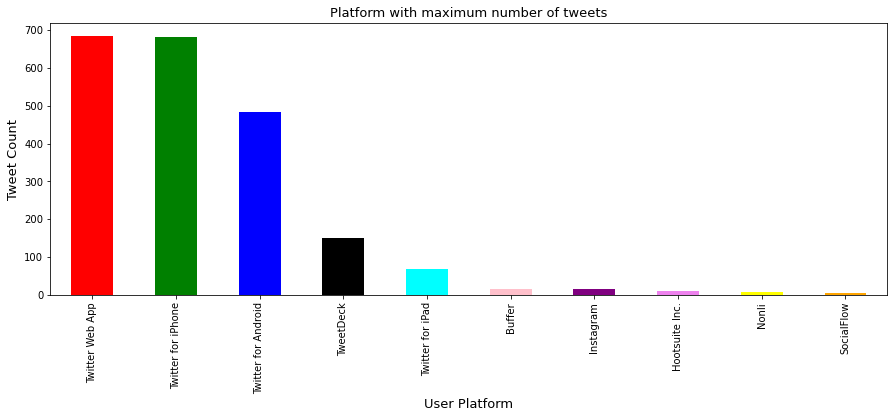

In [9]:
plt.figure(figsize=(15,5))
src = tweets['source'].value_counts().sort_values(ascending=False)
source = src.head(10)
source.plot.bar(color=['red', 'green', 'blue', 'black','cyan','pink','purple','violet','yellow','orange'])
plt.title('Platform with maximum number of tweets',size=13)
plt.xlabel('User Platform',size=13)
plt.ylabel('Tweet Count',size=13)
plt.show()

#### 3.2 Day with maximum number of tweets

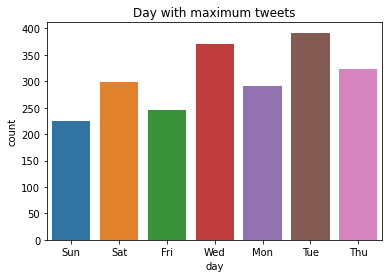

In [10]:
tweets["date"] = pd.to_datetime(tweets["date"])
tweets["Month"] = tweets["date"].apply(lambda x : x.month)
tweets["day"] = tweets["date"].apply(lambda x : x.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
tweets["day"] = tweets["day"].map(dmap)
plt.title("Day with maximum tweets")
sns.countplot(tweets["day"])

#### 3.3 Top 10 users with maximum number of tweets

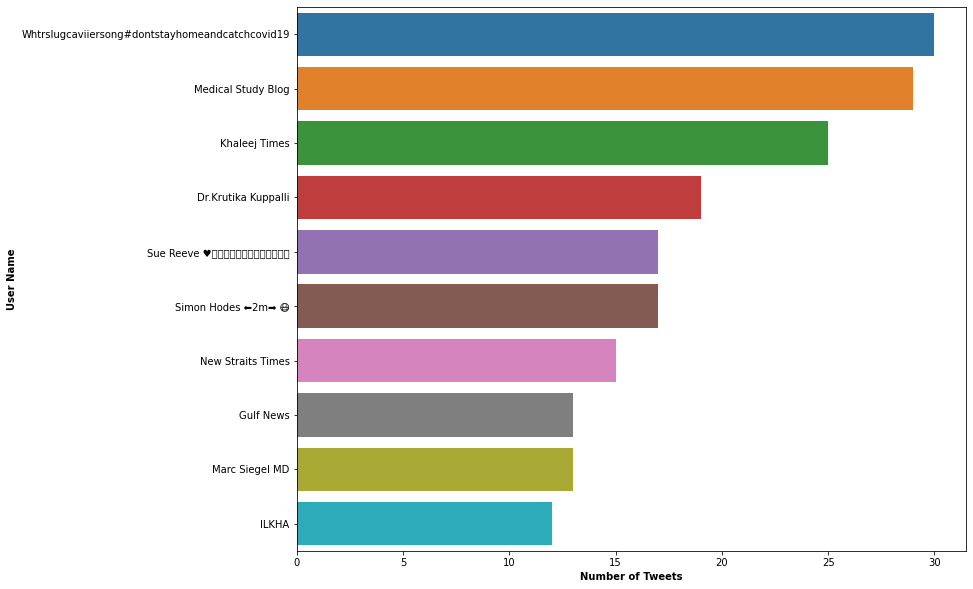

In [11]:
plt.figure(figsize=(12,10))
sns.countplot(y='user_name', data=tweets, order=tweets['user_name'].value_counts().index[:10])
plt.xlabel('Number of Tweets', weight='bold')
plt.ylabel('User Name', weight='bold')
plt.show()

#### 3.4 Top 10 locations with maximum number of users

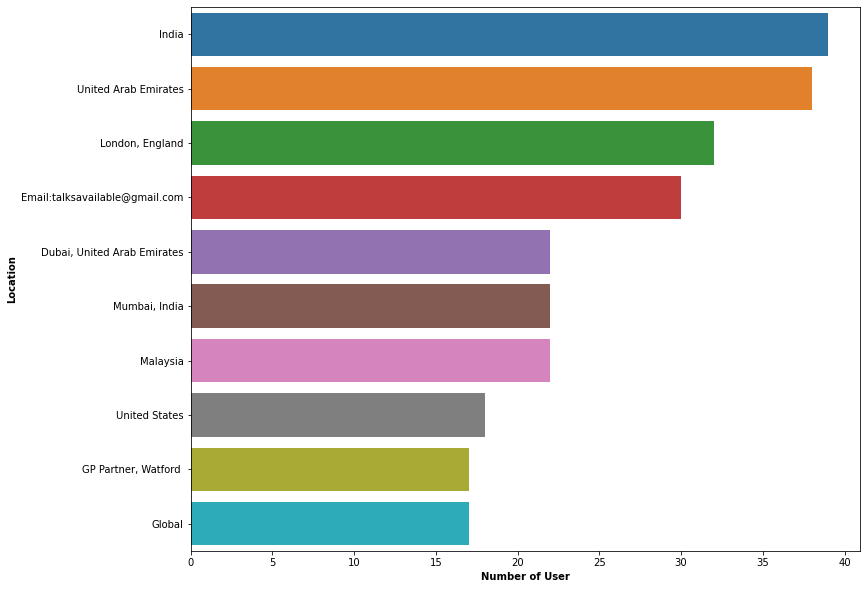

In [12]:
plt.figure(figsize=(12,10))
sns.countplot(y='user_location', data=tweets, order=tweets['user_location'].value_counts().index[:10])
plt.xlabel('Number of User', weight='bold')
plt.ylabel('Location', weight='bold')
plt.show()

### 4.Followers and Retweets

#### 4.1 Number of Followers and Retweets for each type of user

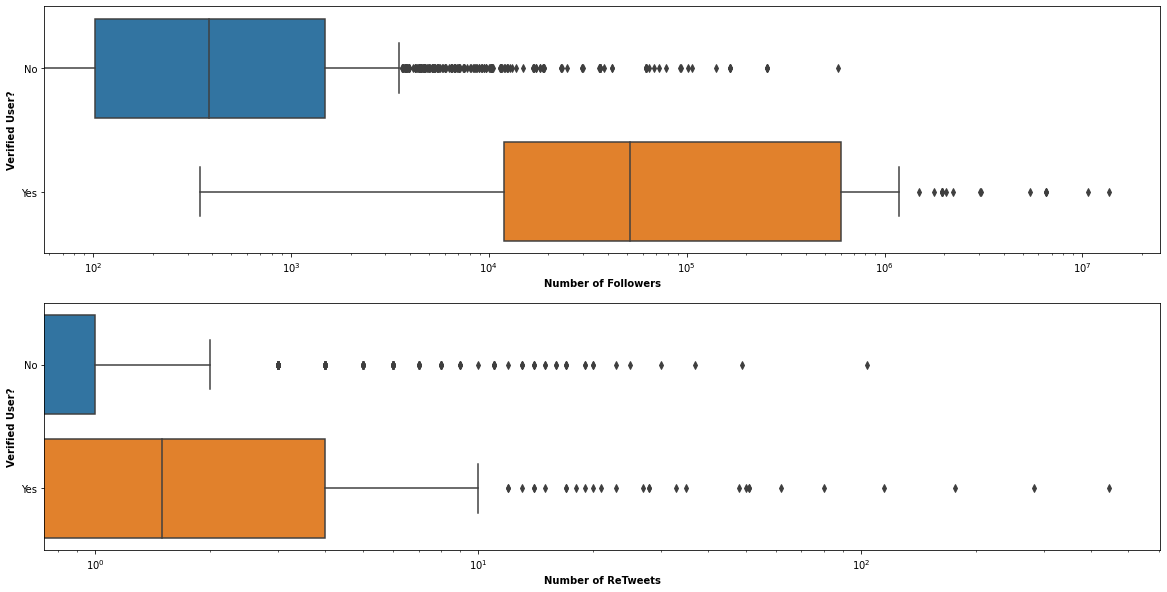

In [13]:
tweets_temp = tweets.copy()
tweets_temp['user_verified'] = tweets_temp['user_verified'].astype('str')
tweets_temp['user_verified'] = tweets_temp['user_verified'].str.replace('False','No')
tweets_temp['user_verified'] = tweets_temp['user_verified'].str.replace('True','Yes')

fig, ax = plt.subplots(2,1,figsize=(20,10))
sns.boxplot(y='user_verified', x='user_followers', data=tweets_temp, ax=ax[0])
ax[0].set_xscale('log')
ax[0].set_xlabel("Number of Followers", weight='bold')
ax[0].set_ylabel('Verified User?', weight='bold')

sns.boxplot(y='user_verified', x='retweets', data=tweets_temp, ax=ax[1])
ax[1].set_xscale('log')
ax[1].set_xlabel("Number of ReTweets", weight='bold')
ax[1].set_ylabel('Verified User?', weight='bold')
plt.show()

### 5.Missing Values

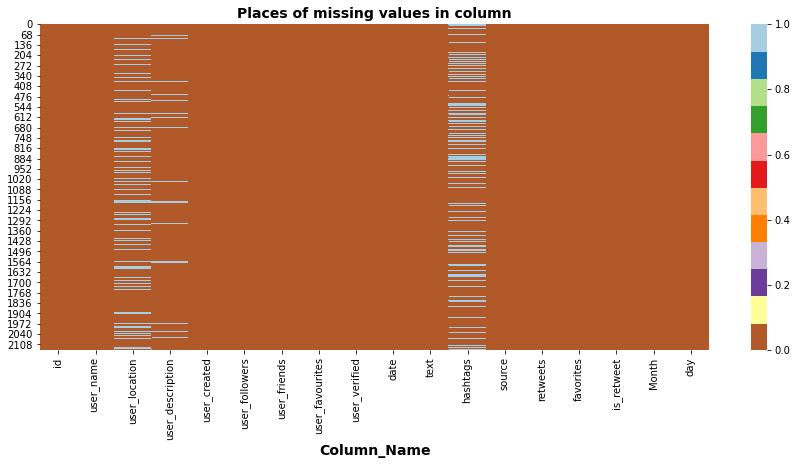

In [14]:
plt.figure(figsize=(15, 6))
sns.heatmap(tweets.isnull(), cbar=True, cmap='Paired_r')
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=14)
plt.show()

In [15]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [16]:
missing_data(tweets)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,Month,day
Total,0,0,462,105,0,0,0,0,0,0,0,539,1,0,0,0,0,0
Percent,0,0,21.5184,4.89054,0,0,0,0,0,0,0,25.1048,0.0465766,0,0,0,0,0
Types,int64,object,object,object,object,int64,int64,int64,bool,datetime64[ns],object,object,object,int64,int64,bool,int64,object


### 6. Unique Values

In [17]:
def unique_values(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe

In [18]:
udf = unique_values(tweets)
udf

,Features,Uniques
0,id,2147
1,user_name,1463
2,user_location,760
3,user_description,1387
4,user_created,1464
5,user_followers,1139
6,user_friends,1037
7,user_favourites,1381
8,user_verified,2
9,date,2145


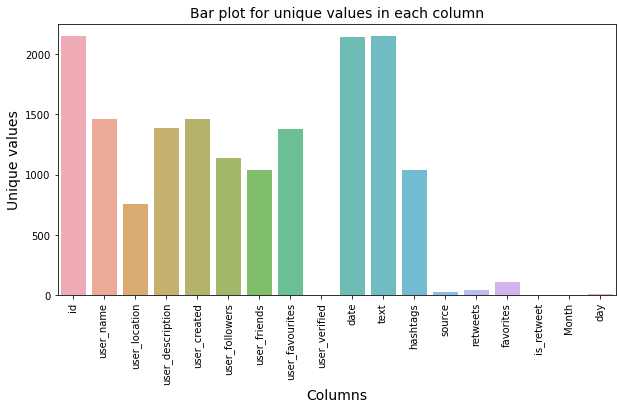

In [19]:
f, ax = plt.subplots(1,1, figsize=(10,5))
sns.barplot(x=udf['Features'], y=udf['Uniques'], alpha=0.8)
plt.title('Bar plot for unique values in each column', fontsize=14)
plt.ylabel('Unique values', fontsize=14)
plt.xlabel('Columns', fontsize=14)
plt.xticks(rotation=90)
plt.show()

### 7.Most frequent values

In [20]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [21]:
most_frequent_values(tweets)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,Month,day
Total,2147,2147,1685,2042,2147,2147,2147,2147,2147,2147,2147,1608,2146,2147,2147,2147,2147,2147
Most frequent item,1338923664033648643,Whtrslugcaviiersong#dontstayhomeandcatchcovid19,India,Hot original songs available/ whtrslugcaviiers...,2019-09-22 16:45:47,106,1079,32,False,2020-12-17 19:58:26,Pfizer/BioN vaccines are in hospitals for almo...,['PfizerBioNTech'],Twitter Web App,0,0,False,12,Tue
Frequence,1,30,39,30,30,31,29,33,1833,2,1,238,685,1475,887,2147,1976,392
Percent from total,0.047,1.397,2.315,1.469,1.397,1.444,1.351,1.537,85.375,0.093,0.047,14.801,31.92,68.701,41.313,100,92.035,18.258


### 8. Distribution of words in text column

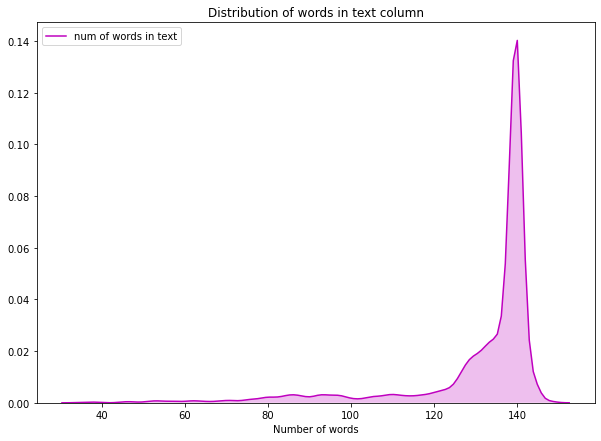

In [22]:
tweets["num of words in text"] = tweets["text"].apply(lambda x: len(x))
plt.figure(figsize=(10,7))
sns.kdeplot(tweets["num of words in text"],shade=True, color='m')
plt.title("Distribution of words in text column")
plt.xlabel("Number of words")
plt.show()

### 9.Data distribution

In [23]:
def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()

#### a.Username

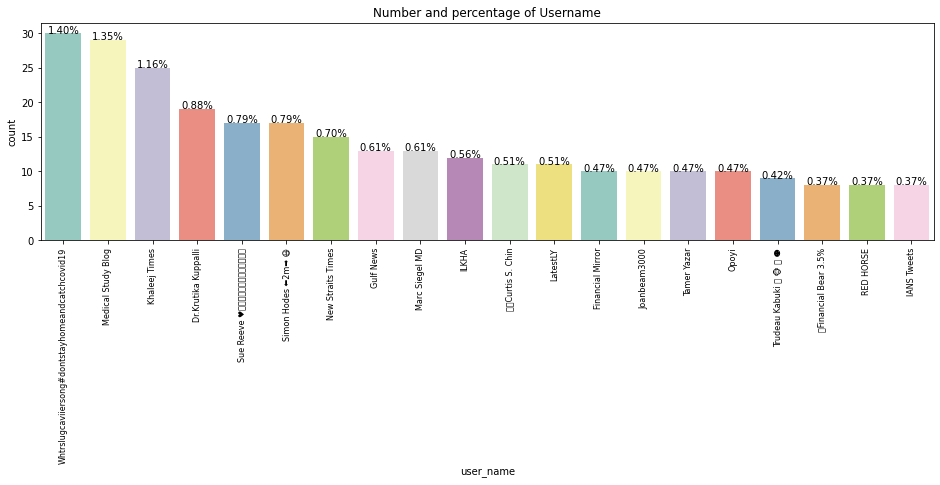

In [24]:
plot_count("user_name", "Username", tweets,4)

#### b.User Location

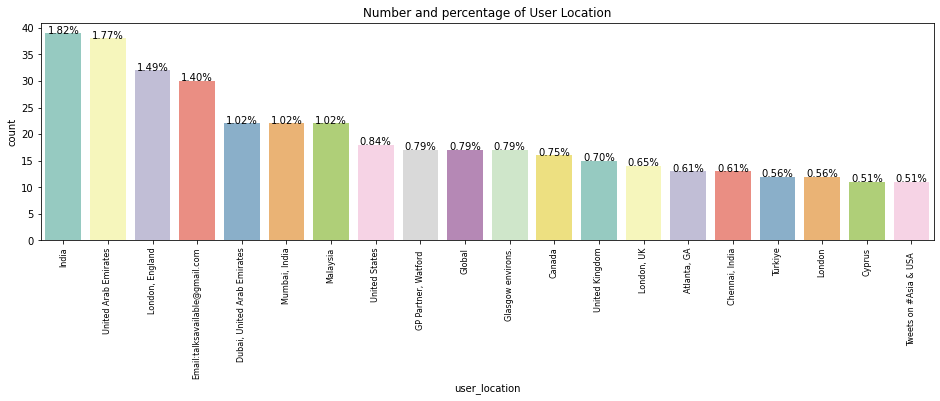

In [25]:
plot_count("user_location", "User Location", tweets,4)

#### c.Tweet Source

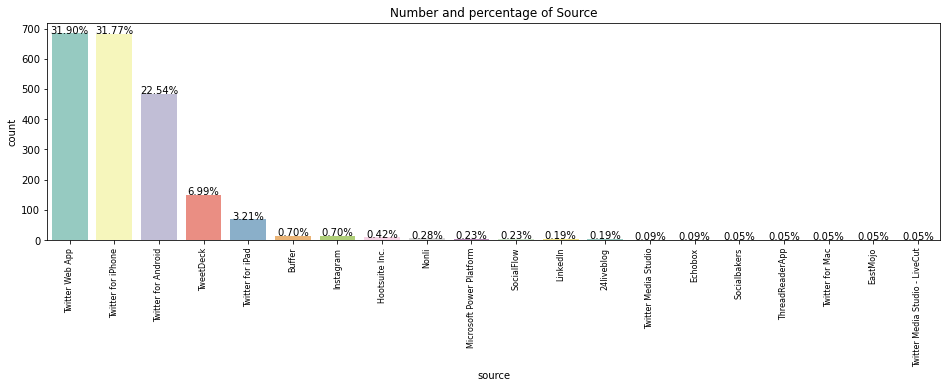

In [26]:
plot_count("source", "Source", tweets,4)

### 10.Word-Clouds

In [27]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

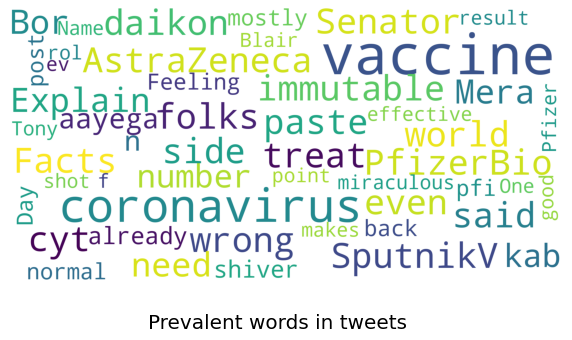

In [28]:
show_wordcloud(tweets['text'], title = 'Prevalent words in tweets')

#### 10.1 India

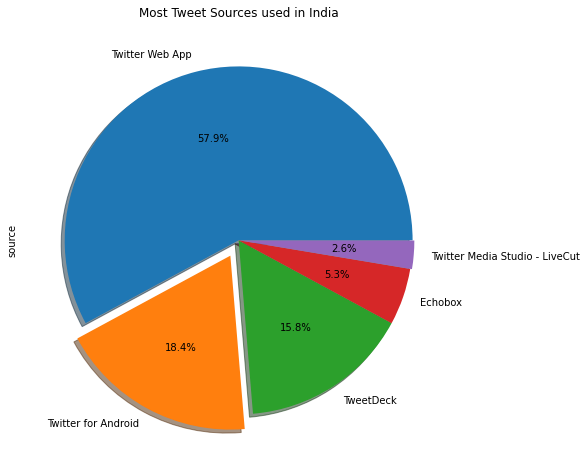

In [29]:
pla = tweets['source'][tweets['user_location'] == 'India'].value_counts().sort_values(ascending=False)
explode = (0, 0.1, 0, 0,0.01) 
plt.figure(figsize=(8,8))
pla[0:5].plot(kind = 'pie', title = 'Most Tweet Sources used in India', autopct='%1.1f%%',shadow=True,explode = explode)
plt.show()

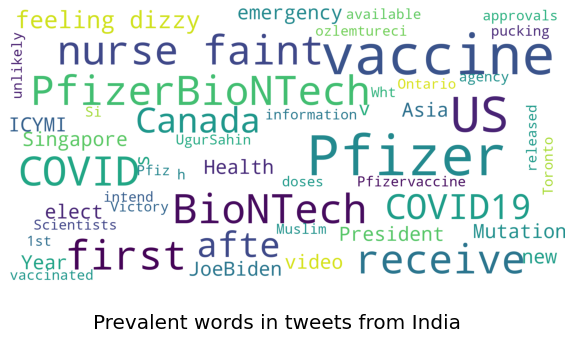

In [30]:
india = tweets.loc[tweets.user_location=="India"]
show_wordcloud(india['text'], title = 'Prevalent words in tweets from India')

#### 10.2 United States

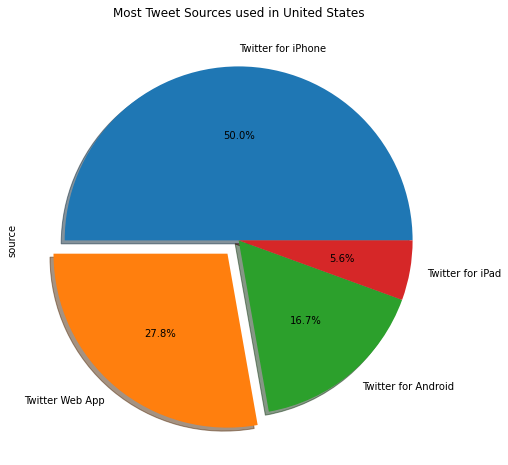

In [31]:
pla = tweets['source'][tweets['user_location'] == 'United States'].value_counts().sort_values(ascending=False)
explode = (0, 0.1, 0, 0) 
plt.figure(figsize=(8,8))
pla[0:4].plot(kind = 'pie', title = 'Most Tweet Sources used in United States', autopct='%1.1f%%',shadow=True,explode = explode)
plt.show()

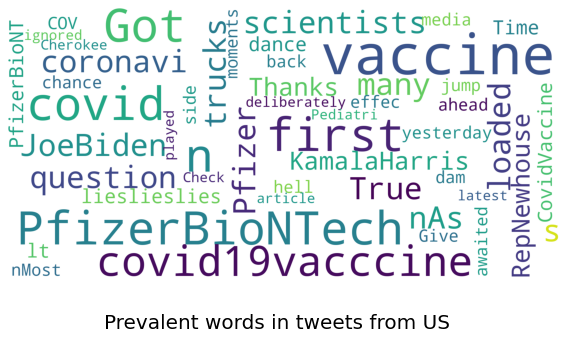

In [32]:
us = tweets.loc[tweets.user_location=="United States"]
show_wordcloud(us['text'], title = 'Prevalent words in tweets from US')

#### 10.3 United Kingdom

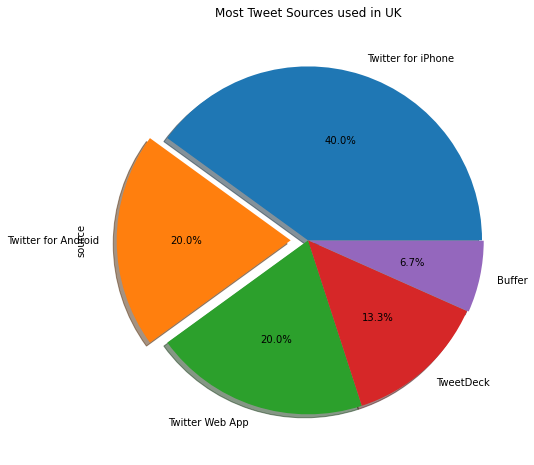

In [33]:
pla = tweets['source'][tweets['user_location'] == 'United Kingdom'].value_counts().sort_values(ascending=False)
explode = (0, 0.1, 0, 0,0.01) 
plt.figure(figsize=(8,8))
pla[0:5].plot(kind = 'pie', title = 'Most Tweet Sources used in UK', autopct='%1.1f%%',shadow=True,explode = explode)
plt.show()

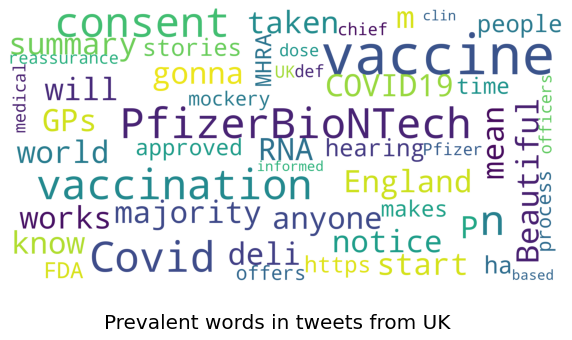

In [34]:
uk = tweets.loc[tweets.user_location=="United Kingdom"]
show_wordcloud(uk['text'], title = 'Prevalent words in tweets from UK')

#### 10.4 Canada

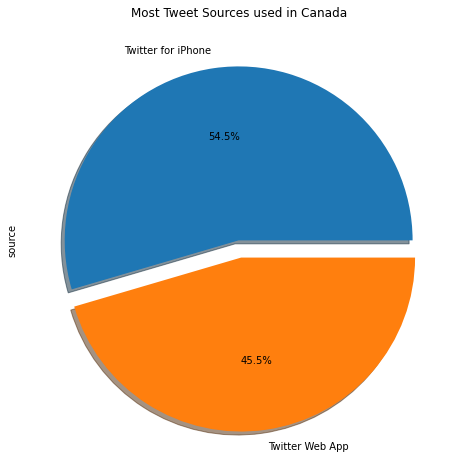

In [35]:
pla = tweets['source'][tweets['user_location'] == 'Canada'].value_counts().sort_values(ascending=False)
explode = (0, 0.1) 
plt.figure(figsize=(8,8))
pla[0:2].plot(kind = 'pie', title = 'Most Tweet Sources used in Canada', autopct='%1.1f%%',shadow=True,explode = explode)
plt.show()

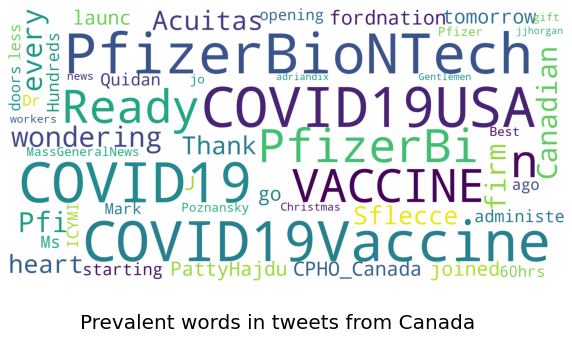

In [36]:
ca = tweets.loc[tweets.user_location=="Canada"]
show_wordcloud(ca['text'], title = 'Prevalent words in tweets from Canada')

### 11.Hashtags

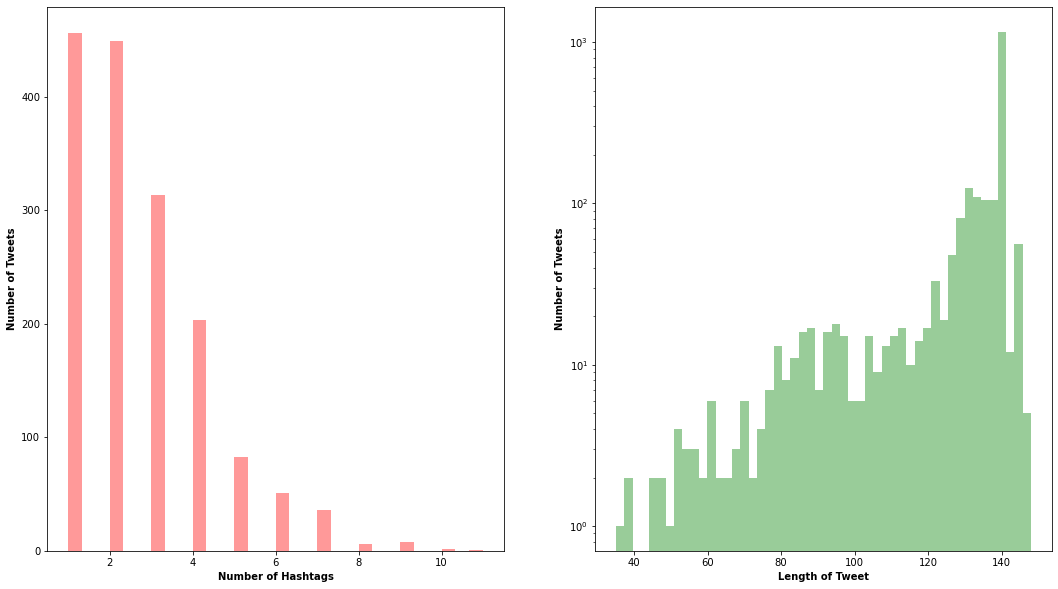

In [37]:
fig, ax = plt.subplots(1,2, figsize=(18, 10))
sns.distplot(tweets['hashtags'].dropna().apply(lambda x: len(x.split(','))).tolist(), kde=False, ax=ax[0], color='red')
ax[0].set_xlabel("Number of Hashtags", weight='bold')
ax[0].set_ylabel('Number of Tweets', weight='bold')

sns.distplot(tweets['text'].str.len().tolist(), kde=False, ax=ax[1], color='green')
ax[1].set_xlabel("Length of Tweet", weight='bold')
ax[1].set_ylabel('Number of Tweets', weight='bold')
ax[1].set_yscale('log')
plt.show()

#### 11.1 Top-5 Hashtags

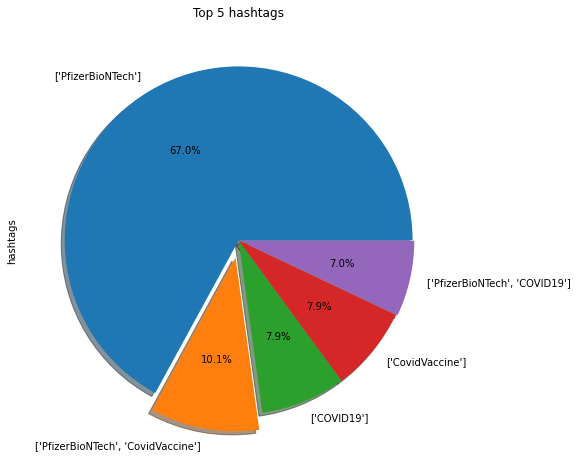

In [38]:
top_tags=tweets['hashtags'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(8,8))
explode = (0, 0.1, 0, 0,0.01) 

top_tags[0:5].plot(kind = 'pie',title = 'Top 5 hashtags',autopct='%1.1f%%',shadow=True,explode = explode)

#### 11.2 Hashtags per tweet

In [39]:
def plot_features_distribution(features, title, tweets, isLog=False):
    plt.figure(figsize=(12,6))
    plt.title(title)
    for feature in features:
        if(isLog):
            sns.distplot(np.log1p(tweets[feature]),kde=True,hist=False, bins=120, label=feature)
        else:
            sns.distplot(tweets[feature],kde=True,hist=False, bins=120, label=feature)
    plt.xlabel('')
    plt.legend()
    plt.show()

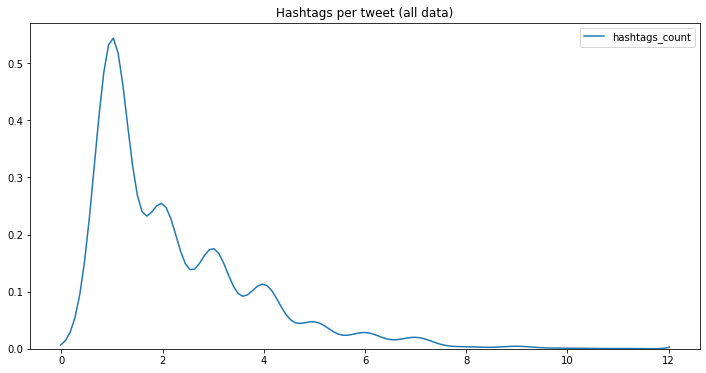

In [40]:
tweets['hashtags'] = tweets['hashtags'].replace(np.nan, "['None']", regex=True)
tweets['hashtags'] = tweets['hashtags'].apply(lambda x: x.replace('\\N',''))
tweets['hashtags_count'] = tweets['hashtags'].apply(lambda x: len(x.split(',')))
plot_features_distribution(['hashtags_count'], 'Hashtags per tweet (all data)', tweets)

In [41]:
tweets['hashtags_individual'] = tweets['hashtags'].apply(lambda x: x.split(','))
from itertools import chain
all_hashtags = set(chain.from_iterable(list(tweets['hashtags_individual'])))
print(f"There are totally {len(all_hashtags)} tweets")

There are totally 1279 tweets


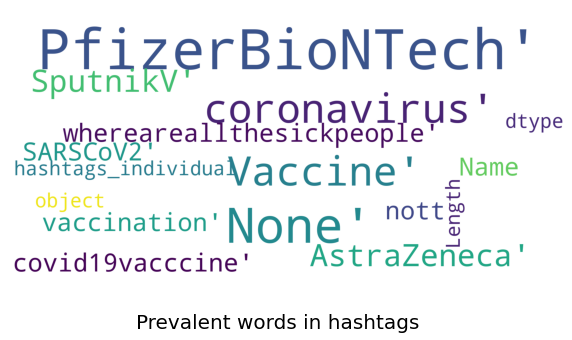

In [42]:
show_wordcloud(tweets['hashtags_individual'], title = 'Prevalent words in hashtags')

### 12. Plot correlation among various numerical features

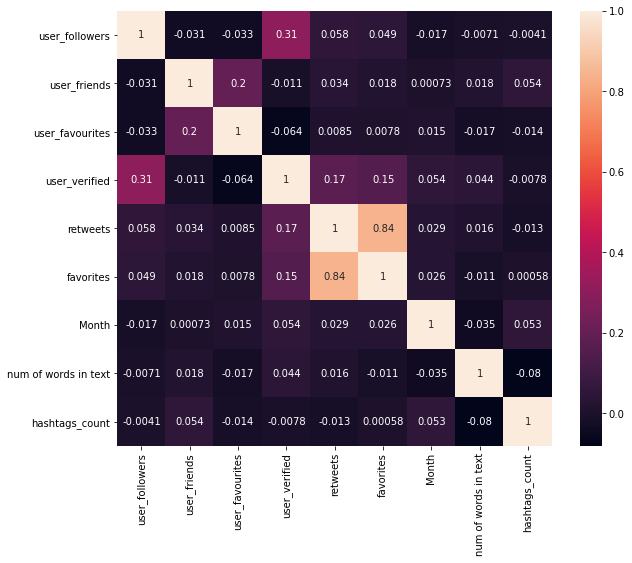

In [43]:
plt.figure(figsize=(10,8))
sns.heatmap(tweets.drop(columns=['id','is_retweet']).corr(), square=True, annot=True)
plt.show()